<div style="text-align: center;">
    <h1 style="color: #3498db;">Artificial Intelligence & Machine Learning</h1>
    <h2 style="color: #3498db;">DecisionTree Splitting Criteria</h2>
</div>

-------------------------------------------------------------

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Authors:</b> K. Said<br>
    <b>Date:</b> 08-09-2023
</div>

<div style="background-color: #e6e6e6; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p>This notebook is part of the "Artificial Intelligence & Machine Learning" lecture material. The following copyright statement applies to all contents and code within this file.</p>
    <b>Copyright statement:</b>
    <p>This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors and lecturers.</p>
</div>


<h1 style="color:rgb(0,120,170)">Introduction</h1>

-----------------------------------------------

<h2 style="color:rgb(0,120,0)">What you have learned so far</h2>

--------------------------------------------------------------------

Now that you arrived at one of the last exercises, let us have a short recap of what we have learned so far.
In the first exercises we chose a dataset, analysed it and tried to gain some insights. In the steps afterwards we preprocessed the dataset, saved the preprocessed data and loaded it for our ML-models. Afterwards we made some predictions with "relatively" simple models and learned about different evaluation metrics for different subareas of AI (regression, classification, clustering).

<h2 style="color:rgb(0,120,0)">Our Task</h2>

-------------------------------------------------

In this notebook, our focus will be instead on different splitting criteria of DecisionTree Classifiers, such as Entropy and Gini. We will try to have a look at the created Decision-Trees and if possible, further increase their accuracy by using GridSearch.





<h1 style="color:rgb(0,120,170)">Splitting Criteria</h1>


When using Decision Trees to predict some values/classes, we have to somehow decide when to split a dataset. The choise of how to split the data at each node is very crucial and is determined by a splitting criterion. 
Now what is the splitting criterion good for? Well, the splitting criterion is needed to measure how good the quality of a split was. Two commonly used criteria are Gini impurity and Entropy, often used in conjunction with Information Gain.

And that's exactly what we are going to do in this notebook. We will play around with different splitting criteria and also try to finetune a Decision Tree Model to further increase the accuracy of our predictions. For this very purpose we will play around with the breast cancer dataset and try to predict wether an example should be labeled as cancer or non-cancer.

**Sidenote**: The breast cancer dataset is freely available on kaggle. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The dataset is also available by simply using sklearn's [load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

In [ ]:
# Get some necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mod5_utils

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Load dataset</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   As usual, we first start by loading our dataset and having a short look at it. In order to get everything in a compact view, we will use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html" target="_blank" style="color: blue; text-decoration: none;">describe()</a> method of pandas.
</div>
</details>


In [ ]:
# RUN CODE CELL
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

data = pd.DataFrame(data=X, columns=breast_cancer.feature_names)
data['target'] = y

display(data, data.describe())

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Dataset Overview</b>: Based on above "description" of the dataset, we can not only see the mean of the dataset (for different features), but also multiple other things such as standard deviation, min, max and some more. Have a look at above table and try to get a feeling for the dataset before moving on.

</div>


<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Split dataset</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   Create a train and test dataset, where the train_dataset has 75% of all data. 
   If you did everything right, then the size of the dataset should look like this:

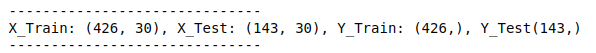
    

**HINT:** Try to remember how we preprocessed the dataset in Module 3.
    
</div>
</details>


In [ ]:
# TODO: Split dataset --> Naming should be X_train, X_test, y_train, y_test



In [ ]:
# RUN CODE CELL --> Tests wether you did everything right
mod5_utils.data_split_test(X_train, y_train, X_test, y_test)

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Information Gain and Entropy</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
Next up we want to load a simple DecisionTree Classifier and train it on the newly created Trainingset. However, as you know from the lectures, we have to know some kind of splitting criteria in order to correctly implement our model, which is why we want to use in this section the Entropy as our splitting criteria for our model.

Here a short recap how the formula looked:
    
Information Gain (IG) Formula:
$IG(D, A) = H(D) - H(D|A)$

Entropy (H) Formula:

$H(D) = - \sum_{i=1}^{c} p_i \log_2(p_i)$

Where:
- $IG(D, A)$ represents the Information Gain for a dataset $D$ and attribute $A$.
- $H(D)$ represents the entropy of dataset $D$.
- $H(D|A)$ represents the conditional entropy of dataset $D$ given attribute $A$.
- $c$ represents the number of classes or outcomes in the dataset.
- $p_i$ represents the probability of class $i$ in the dataset $D$.
    
    
Don't worry, you don't have to implement everything from scratch, in order to make our life easier, we will use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank" style="color: blue; text-decoration: none;">DecisionTreeClassifier()</a> class of sklearn. With this we can simply define the criteria. The parameters of the model should be set as follows:
    
- criterion = entropy
- max_depth = 5
- random_state = 42

.
</div>
</details>


In [ ]:
# TODO: Load model
entropy_classifier = None

# TODO: Fit the model



In [ ]:
# RUN CODE CELL --> Checks for model implementation
mod5_utils.test_model(entropy_classifier, "entropy")

In [ ]:
# RUN CODE CELL ---> Visualization for your DecisionTree
plt.figure(figsize=(15, 9))
plot_tree(entropy_classifier, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names)
plt.show()

entropy_accuracy = entropy_classifier.score(X_test, y_test)
print(f'Accuracy (Entropy): {entropy_accuracy:.2f}')

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>DecisionTree with Entropy</b>: The result looks pretty nice, we got an accuracy of well above 90%. The interesting part might be how the Tree actually made it's splitting decisions. For this, have a closer look at above Tree that was plotted.

</div>


<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Gini</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   Now that we saw the result of our classifier by using Entropy, let's try it this time but with Gini. But before we start, below is the formula in order to refresh your memory.

Gini Impurity (GI) Formula:

$GI(D) = 1 - \sum_{i=1}^{c} p_i^2$

Where:
- $GI(D)$ represents the Gini Impurity of dataset $D$.
- $c$ represents the number of classes or outcomes in the dataset.
- $p_i$ represents the probability of class $i$ in the dataset $D$.

 
Also here use the same parameters when loading the model, with the only difference being the criterion
- criterion = gini
- max_depth = 5
- random_state = 42.
</div>
</details>


In [ ]:
# TODO: Load model with gini
gini_classifier = None

# TODO: Fit the model


In [ ]:
# RUN CODE CELL --> Check correct model implementation
mod5_utils.test_model(gini_classifier, "gini")

In [ ]:
plt.figure(figsize=(15, 9))
plot_tree(gini_classifier, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names)
plt.show()

# Evaluate the classifier
gini_accuracy = gini_classifier.score(X_test, y_test)
print(f'Accuracy (Entropy): {gini_accuracy:.2f}')

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>DecisionTree with Gini</b>: Also here we got a pretty high accuracy (even the same). However, when comparing both trees, the structure does indeed look a bit different. Try to compare both trees and understand their differences.

</div>


<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Fine-Tune Parameters</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   Now in this final step we want to see wether we can further improve the accuracy of our model. For this very purpose we will use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank" style="color: blue; text-decoration: none;">GridSearch()</a> of sklearn. This will help us to finetune our model. Below are some parameters and their corresponding values that we already filled for you. Your task now is to further add/delete values and play around with it to find the best model. Try to beat the previous models.
</div>
</details>


In [ ]:
new_dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [1, 2],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(new_dt_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model_score = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", best_model_score)

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Results after fine-tuning</b>: If you were able to beat the previous models, try to understand why the results got better/worse when changing some parameters. And as a bonus, you might also want to plot the best DecisionTree Classifier.

</div>
